In [1]:
using Distributions

In [2]:
using Plots

In [49]:
f(x) = x^2
f(3)

9

In [7]:
a = Normal(1,2)

Normal{Float64}(μ=1.0, σ=2.0)

In [9]:
?pdf

search: pdf logpdf logpdf! gradlogpdf Cptrdiff_t componentwise_pdf



```
pdf(d::UnivariateDistribution, x::Real)
```

Evaluate the probability density (mass) at `x`.

See also: [`logpdf`](@ref).

---

```
pdf(d::DiscreteUnivariateDistribution, x::T) where {T<:Real}
```

Evaluate the probability density (mass) at `x`. If `T` is not an `Integer` type but `x` is integer, the value is converted to `Int`.

The version with `x::Integer` must be implemented by discrete distributions.

See also: [`logpdf`](@ref).

---

```
pdf(d, x)
```

Calculates the PDF of the specified distribution 'd'.

---

```
pdf(d::MultivariateDistribution, x::AbstractArray)
```

Return the probability density of distribution `d` evaluated at `x`.

  * If `x` is a vector, it returns the result as a scalar.
  * If `x` is a matrix with n columns, it returns a vector `r` of length n, where `r[i]` corresponds

to `x[:,i]` (i.e. treating each column as a sample).

`pdf!(r, d, x)` will write the results to a pre-allocated array `r`.

---

```
pdf(d::MatrixDistribution, x::AbstractArray)
```

Compute the probability density at the input matrix `x`.

---

```
pdf(d::Union{UnivariateMixture, MultivariateMixture}, x)
```

Evaluate the (mixed) probability density function over `x`. Here, `x` can be a single sample or an array of multiple samples.


In [12]:
struct MyDist <: ContinuousUnivariateDistribution end

In [13]:
Distributions.pdf(::MyDist, x) = 3/2*x^2

In [17]:
pdf(MyDist(), 0.99999)

1.4999700001500003

In [32]:
a = MyDist()

MyDist()

In [39]:
using Pkg

In [40]:
Pkg.add("Roots")

  Updating registry at `C:\Users\masahiro\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 % %Fetching: [====>                                    ]  7.8 % [=====>                                   ]  11.5 %7 %Fetching: [========>                                ]  18.3 %Fetching: [==========>                              ]  23.3 %]  27.0 %Fetching: [==============>                          ]  34.5 % [================>                        ]  39.1 %Fetching: [====================>                    ]  48.0 %Fetching: [======================>                  ]  52.7 %.6 %Fetching: [==========================>              ]  62.6 %66.1 %69.6 %9 %.9 %2 %Fetching: [==================================>      ]  84.5 %.0 %7 %Fetching: [======================================>  ]  94.9 %>]  99.1 % Resolving package versions...
 Installed ZeroMQ_jll ─────── v4.3.2+0
 Installed Ratios

In [41]:
using Roots 

┌ Info: Precompiling Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1273


In [176]:

histogram(y)

0.4165116111398499


MethodError: MethodError: no method matching +(::Int64, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(::T, !Matched::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:53
  +(::Integer, !Matched::Integer) at int.jl:871
  ...

In [276]:
function solve_eq(right)
    f(x)= 1/2*x^3+1/2-right
    return find_zeros(f,-Inf,Inf)
end

1-element Array{Float64,1}:
 2.2239800905693152

In [277]:
function rand_sample()
    area = rand(Uniform(0,1))
    x = solve_eq(area)
    return x[1]
end

y = []
z = []
for x in 1:5000
    num=0
    for i in 1:15
        
        c = rand_sample()
        push!(z,c)
        num+=c
    end
    push!(y,num)
end


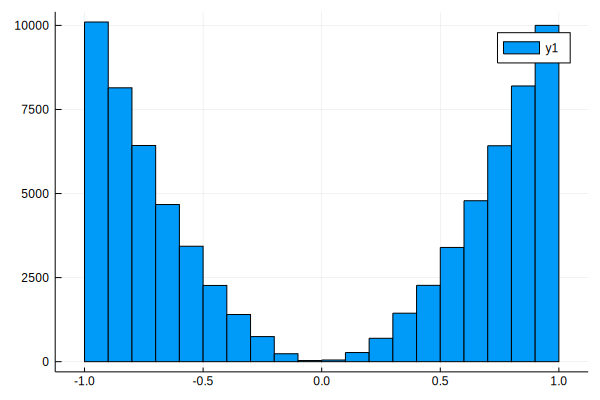

In [280]:
histogram(z)

var sum: 81.83015796546299 mean sum: 28.956317867053045
var original: 1.64584576417407 mean original: 0.5791263573410609


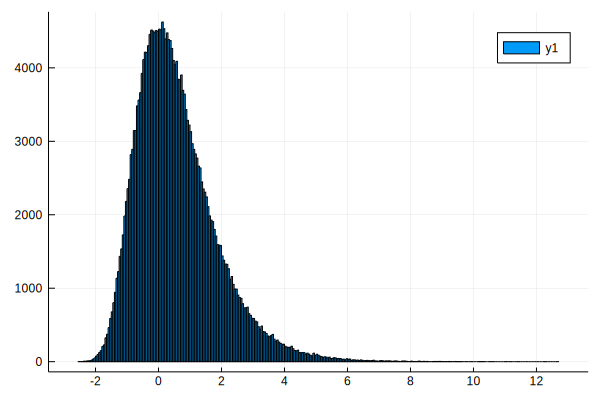

In [329]:
function func_sum(dist)
    ary = []
    ary2=[]
    for i in 1:5000
        a = 0
        for x in 1:50
            y=rand(dist)
            a+=y
            push!(ary2,y)
        end
        push!(ary,a)
    end
    println("var sum: ", var(ary)," mean sum: ",mean(ary),"\nvar original: ", var(ary2)
    , " mean original: ", mean(ary2))
    histogram(ary2)
end
function func_mean(dist)
    ary=[]
    for i in 1:5000
        a = 0
        for x in 1:30
            a+=rand(dist)
        end
        push!(ary,a/30)
    end
    histogram(ary)
end
        
# func_sum(Uniform(3,9))
# func_sum(Binomial(5, 0.1))
# func_mean(Gamma())
# func_sum(Gamma())                ## variance of Y is (sample size) * (variance of X)
func_sum(DoubleExponential())  ##mean of Y is (sample size) * (mean of X)

In [318]:
x = rand(DoubleExponential(),1000000)
# histogram(x)
mean(x),var(x)
#  0.9*0.1*5*30

(0.5761367944520195, 1.6463234145947794)

In [249]:
ary = rand(Gamma(10000,2),10000)
ary2 = rand(Exponential(2),10000)
print(mean(ary2)*10000, " ", mean(ary))

19691.886624933657 20000.503258569082

In [258]:
bi_n = rand(Binomial(100,0.1),10000).*100
bi_nm= rand(Binomial(10000,0.1),10000)
mean(bi_n), mean(bi_nm)

(998.38, 999.6073)